
# CODE TO PERFORM POLYNOMIAL REGRESSION
# Dr. Ryan @STEMplicity
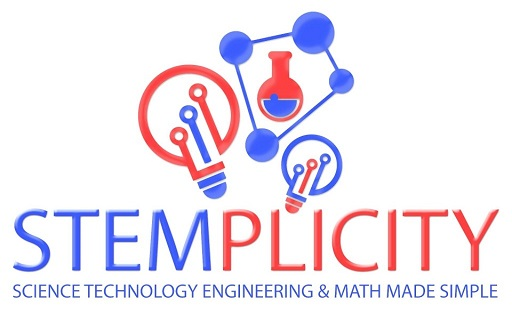



# PROBLEM STATEMENT

Let's assume that you work as a consultant to a start-up company that was looking to develp a model to estimate the cost of good sold as they vary the production volume (number of units produced). The startup gathered data and has asked you to develop a model to predict its cost vs. number of units sold. You thought a polynomial regression model might be a good candidate.

# STEP#1: IMPORT LIBRARIES 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# STEP#2: IMPORT DATASET

In [3]:
economies = pd.read_csv('EconomiesOfScale.csv')

In [4]:
economies

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013
...,...,...
995,8.099710,23.855067
996,8.739752,27.536542
997,8.780888,25.973787
998,8.897700,25.138311


In [5]:
economies.head()

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013


In [6]:
economies.tail()

,Number of Units,Manufacturing Cost
995,8.099710,23.855067
996,8.739752,27.536542
997,8.780888,25.973787
998,8.897700,25.138311
999,10.000000,21.547777


In [8]:
economies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of Units     1000 non-null   float64
 1   Manufacturing Cost  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


# STEP#3: VISUALIZE DATASET

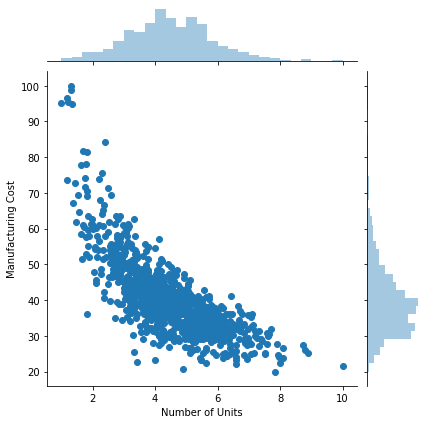

In [9]:
sns.jointplot(x='Number of Units', y='Manufacturing Cost', data=economies)

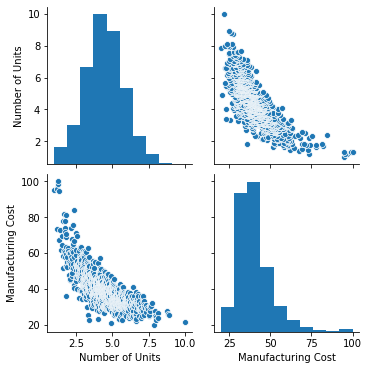

In [10]:
sns.pairplot(economies)

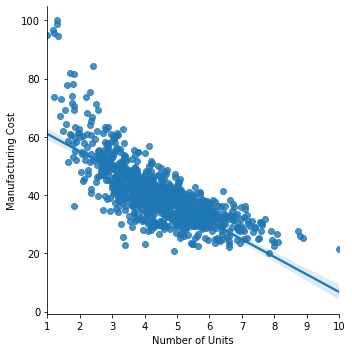

In [11]:
sns.lmplot(x='Number of Units', y='Manufacturing Cost', data=economies)

# STEP#4: CREATE TRAINING DATASET

In [12]:
X = economies[['Number of Units']]

In [14]:
y = economies['Manufacturing Cost']

In [15]:
X.shape

(1000, 1)

In [16]:
y.shape

(1000,)

# (SOLUTION #1: LINEAR ASSUMPTION)

# STEP#5 MODEL TRAINING 

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X, y)

LinearRegression()

In [18]:
print('Linear Coefficient (m)', regressor.coef_)

Linear Coefficient (m) [-6.0333683]


In [19]:
print('Linear Intercept (b)', regressor.intercept_)

Linear Intercept (b) 67.03904193389238


In [20]:
y_pred = regressor.predict(X)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Linear Model Coefficient (m):  [-6.0333683]
Linear Model Coefficient (b):  67.03904193389238


# STEP#6: VISUALIZE THE RESULTS

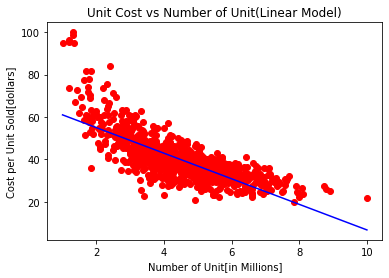

In [21]:
plt.scatter(X, y, color='red')
plt.plot(X, y_pred, color='blue')
plt.title('Unit Cost vs Number of Unit(Linear Model)')
plt.xlabel('Number of Unit[in Millions]')
plt.ylabel('Cost per Unit Sold[dollars]')
plt.show()

# (SOLUTION #2: POLYNOMIAL ASSUMPTION)

In [30]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)
regressor2 = LinearRegression()
regressor2.fit(X_poly, y)

LinearRegression()

In [31]:
print('Linear Coefficient (m)', regressor2.coef_)

Linear Coefficient (m) [ 0.00000000e+00 -5.43308190e+01  1.22452385e+01 -1.29910949e+00
  5.12914120e-02]


In [32]:
print('Linear Intercept (b)', regressor.intercept_)

Linear Intercept (b) 67.03904193389238


In [33]:
y_pred2 = regressor2.predict(poly.fit_transform(X))
                                            

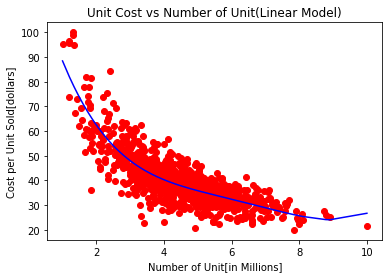

In [34]:
plt.scatter(X, y, color='red')
plt.plot(X, y_pred2, color='blue')
plt.title('Unit Cost vs Number of Unit(Linear Model)')
plt.xlabel('Number of Unit[in Millions]')
plt.ylabel('Cost per Unit Sold[dollars]')
plt.show()

# STEP#5 MODEL TRAINING 

[[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00]
 [1.00000000e+00 1.18599365e+00 1.40658094e+00 1.66819606e+00
  1.97846993e+00]
 [1.00000000e+00 1.19149864e+00 1.41966901e+00 1.69153369e+00
  2.01546010e+00]
 ...
 [1.00000000e+00 8.78088812e+00 7.71039962e+01 6.77041565e+02
  5.94502623e+03]
 [1.00000000e+00 8.89769971e+00 7.91690601e+01 7.04422522e+02
  6.26774007e+03]
 [1.00000000e+00 1.00000000e+01 1.00000000e+02 1.00000000e+03
  1.00000000e+04]]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Linear Model Coefficient (m):  [ 0.00000000e+00 -5.43308190e+01  1.22452385e+01 -1.29910949e+00
  5.12914120e-02]
Linear Model Coefficient (b):  131.71715953602728


# STEP#6: VISUALIZE THE RESULTS

(1000, 1)

(1000,)

Text(0.5,1,'Unit Cost vs. Number of Units [in Millions](Training dataset)')

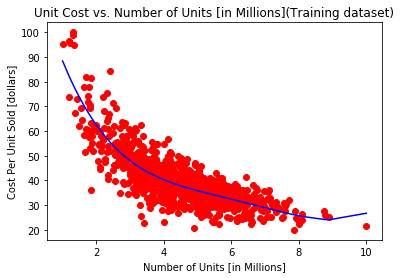

# EXCELLENT JOB! NOW YOU BECAME FAMILIAR WITH POLYNOMIAL REGRESSION!